In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

In [31]:
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pd.read_csv("train.csv")
# Print the first 5 rows of the dataframe.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#the info method displays the data type and null not null and how many entries there
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [33]:
#This can tell us how many missing values are there in the dataset
titanic.isnull().sum()
#Cabin seems to have the most of the missing values 
#Age has 177, we should know that replacing missing ages by the mean or median will result in
#a less accurate estimations

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
df = titanic.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis =1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [36]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


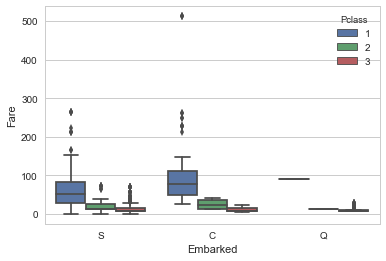

In [37]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df)

In [38]:
# we replace the missing values in the embarked to "C"
df["Embarked"] = df["Embarked"].fillna('C')
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


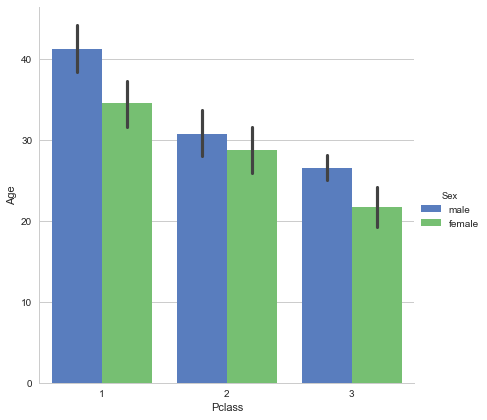

In [39]:
sns.factorplot(x="Pclass", y="Age", hue="Sex", data=df, size=6, kind="bar", palette="muted")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


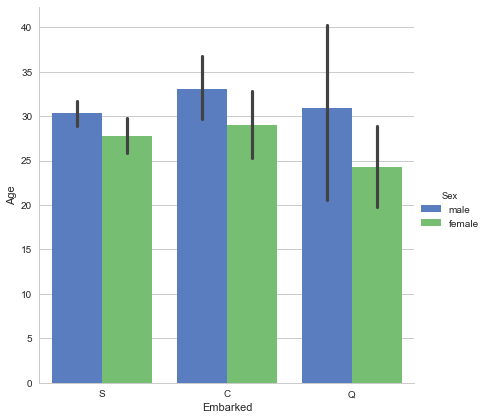

In [40]:
sns.factorplot(x="Embarked", y="Age", hue="Sex", data=df, size=6, kind="bar", palette="muted")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


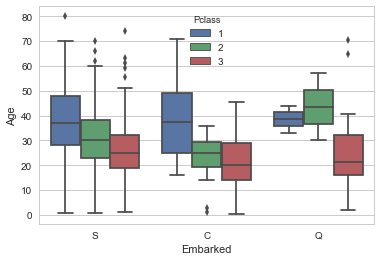

In [41]:
sns.boxplot(x="Embarked", y="Age", hue="Pclass", data=df)

In [44]:
#Getting Embarked S data into separte frame and work to calculate Median for each class
s = df.loc[df["Embarked"] == "S"]
v = [1, 2, 3]
for i in v:
    ss = s.where(s["Pclass"] == i)
    print ("Median age of class ",i, " = ",ss["Age"].median())

Median age of class  1  =  37.0
Median age of class  2  =  30.0
Median age of class  3  =  25.0


In [45]:
#Getting Embarked C data into separte frame and work to calculate Median for each class
c = df.loc[df["Embarked"] == "C"]
v = [1, 2, 3]
for i in v:
    sc = c.where(c["Pclass"] == i)
    print ("Median age of class ",i, " = ",sc["Age"].median())

Median age of class  1  =  37.5
Median age of class  2  =  25.0
Median age of class  3  =  20.0


In [46]:
#Getting Embarked Q data into separte frame and work to calculate Median for each class
q = df.loc[df["Embarked"] == "Q"]
v = [1, 2, 3]
for i in v:
    sq = q.where(q["Pclass"] == i)
    print ("Median age of class ",i, " = ",sq["Age"].median())

Median age of class  1  =  38.5
Median age of class  2  =  43.5
Median age of class  3  =  21.5


In [47]:
#Embark S
s1 = df[(df["Pclass"] == 1) & (df['Embarked'] == "S") & (df['Age'].isnull())].fillna(37)
s2 = df[(df["Pclass"] == 2) & (df['Embarked'] == "S") & (df['Age'].isnull())].fillna(30)
s3 = df[(df["Pclass"] == 3) & (df['Embarked'] == "S") & (df['Age'].isnull())].fillna(25)

#Embark C
c1 = df[(df["Pclass"] == 1) & (df['Embarked'] == "C") & (df['Age'].isnull())].fillna(37.5)
c2 = df[(df["Pclass"] == 2) & (df['Embarked'] == "C") & (df['Age'].isnull())].fillna(25)
c3 = df[(df["Pclass"] == 3) & (df['Embarked'] == "C") & (df['Age'].isnull())].fillna(20)

#Embark Q
q1 = df[(df["Pclass"] == 1) & (df['Embarked'] == "Q") & (df['Age'].isnull())].fillna(38.5)
q2 = df[(df["Pclass"] == 2) & (df['Embarked'] == "Q") & (df['Age'].isnull())].fillna(43.5)
q3 = df[(df["Pclass"] == 3) & (df['Embarked'] == "Q") & (df['Age'].isnull())].fillna(21.5)

In [49]:
#Concatinating all the sub-frames into one frame with replaced Age values
scq = pd.concat([s1,s2,s3,c1,c2,c3,q1,q2,q3])
len(scq) #177 rows which equals to the missing values in the age column
scq

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
55,1,1,male,37.0,0,0,35.5000,S
166,1,1,female,37.0,0,1,55.0000,S
168,0,1,male,37.0,0,0,25.9250,S
185,0,1,male,37.0,0,0,50.0000,S
270,0,1,male,37.0,0,0,31.0000,S
284,0,1,male,37.0,0,0,26.0000,S
298,1,1,male,37.0,0,0,30.5000,S
334,1,1,female,37.0,1,0,133.6500,S
351,0,1,male,37.0,0,0,35.0000,S
457,1,1,female,37.0,1,0,51.8625,S


In [51]:
#We drop records of missing vlaues
df = df.dropna(axis = 0, how = 'any')
#we will be left with only records with non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Sex         714 non-null object
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
Embarked    714 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.2+ KB


In [52]:
#Now we concatinate the scq (replaced values frame) with main frame
data = pd.concat([df, scq])

#Checking the info to make sure we have same number of records as the original one we started with
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 828
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

data['Sex'] = number.fit_transform(data['Sex'].astype('str'))
data['Embarked'] = number.fit_transform(data['Embarked'].astype('str'))
#Check our Dataframe
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [69]:
from sklearn.model_selection import train_test_split
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Y_data = data['Survived'].values
X_data = data[list(features)].values

In [72]:
X_data.size

6237

In [93]:
 X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
print("train size", X_train.size)
print("test size", X_test.size)

train size 4172
test size 2065


In [94]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 
#we predict the survival of the testdata and save it
pseudoY_test = lin_clf.predict(X_test)
pseudoY_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [95]:
y_test

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [98]:
X = np.vstack((X_train, X_test))
Y = np.concatenate((y_train, pseudoY_test), axis=0)

pseudo_model = svm.LinearSVC()
pseudo_model.fit(X, Y)

Accuracypseudo = pseudo_model.score(X_test, y_test)
print ("Accuracy of the pseudo_model model: ", Accuracypseudo*100, "%")

Accuracypseudo = lin_clf.score(X_test, y_test)
print ("Accuracy of the lin_clf model: ", Accuracypseudo*100, "%")

Accuracy of the pseudo_model model:  76.9491525424 %
Accuracy of the lin_clf model:  75.593220339 %


In [102]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearSVC()]

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X, Y)
    accurracy = clf.score(X_test, y_test)
    print(accurracy, name)

0.738983050847 KNeighborsClassifier
0.762711864407 SVC
0.759322033898 DecisionTreeClassifier
0.772881355932 RandomForestClassifier
0.806779661017 AdaBoostClassifier
0.803389830508 GradientBoostingClassifier
0.816949152542 GaussianNB
0.827118644068 LogisticRegression
0.776271186441 LinearSVC
